# Artificial-Intelligence-Software-For-Diagnosis-Of-Cardiovascular-Diseases
Graduation Project of faculty of Computer Science at Ain Shams University 2023


# import libraries

In [11]:
# import nessary libraries
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import pandas as pd

import wfdb
from wfdb import processing
from scipy import signal

# Datasets division

## EDA & Signal Segmentations

### Information of four databases of ECGs used.
<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5971803/9906039/9906046/386-404-table-4-source-small.gif">

#### 1- load data of each disease
    MIT-BIH NSRDB => Normal
    St INCARTDB   => CAD
    PTBDB         => MI
    BIDMC CHFDB   => CHF
    
#### 2- select channel 
    ECG1 and ECG2 leads => MIT-BIH NSRDB, BIDMC CHFDB 
    II and V1 leads     => St INCARTDB, PTBDB

#### 3- visualize 500 sample of each channle

#### 4- Resample data by convert Fs to 250 HZ in all data

##### `Helper Functions`

In [12]:
def resample(path, ann, channelsName, channelsNum):
    record = wfdb.rdrecord(path, channels=channelsNum)
    ann_ref = wfdb.rdann(path,ann)
    print("Shape of signal Before Resampling => ", record.p_signal.shape)
    resampled_sig = wfdb.processing.resample_multichan(record.p_signal, ann_ref, record.fs, 250, resamp_ann_chan=0)[0]  # this retrun p_singal , annotation
    print("Shape of signal After Resampling  => ", resampled_sig.shape)
    resampled_df = pd.DataFrame(resampled_sig, columns=channelsName)
    resampled_df.iloc[:500,:].plot();
    return resampled_df

In [13]:
def resample_MI(path, ann, channelsName, channelsNum):
    record = wfdb.rdrecord(path, channels=channelsNum, sampto=38400)
    ann_ref = wfdb.rdann(path,ann, sampto=38400)
    print("Shape of signal Before Resampling => ", record.p_signal.shape)
    resampled_sig = wfdb.processing.resample_multichan(record.p_signal, ann_ref, record.fs, 250, resamp_ann_chan=0)[0]  # this retrun p_singal , annotation
    print("Shape of signal After Resampling  => ", resampled_sig.shape)
    resampled_df = pd.DataFrame(resampled_sig, columns=channelsName)
    resampled_df.iloc[:500,:].plot();
    return resampled_df

#### `MIT-BIH NSRDB => Normal`

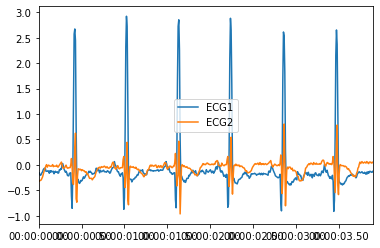

In [14]:
record = wfdb.rdrecord('mit-bih-normal-sinus-rhythm-database-1.0.0/16265', sampto=500)
df = record.to_dataframe()
df.plot();

Shape of signal Before Resampling =>  (11730944, 2)
Shape of signal After Resampling  =>  (22912000, 2)


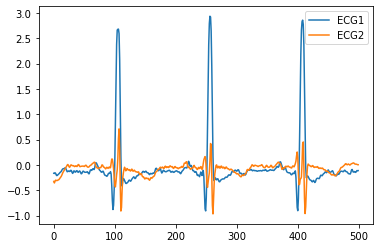

In [15]:
normal_df = resample('mit-bih-normal-sinus-rhythm-database-1.0.0/16265', 'atr', ['ECG1', 'ECG2'], [0,1])

#### `St INCARTDB   => CAD`

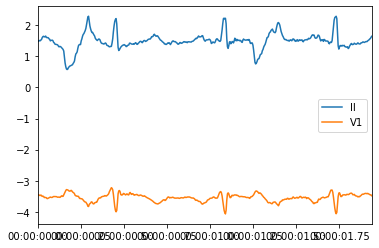

In [16]:
record = wfdb.rdrecord('st-petersburg-incart-12-lead-arrhythmia-database-1.0.0/files/I01', sampto=500, channels=[1,6])
df = record.to_dataframe()
df.plot();

Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)


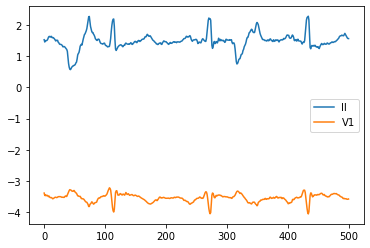

In [17]:
CAD_df = resample('st-petersburg-incart-12-lead-arrhythmia-database-1.0.0/files/I01', 'atr', ['II', 'V1'], [1,6])

#### `PTBDB         => MI`

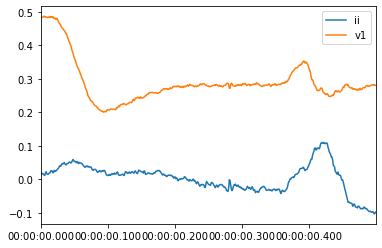

In [18]:
record = wfdb.rdrecord('ptb-diagnostic-ecg-database-1.0.0/patient033/s0105lre', sampto=500, channels=[1,6])
df = record.to_dataframe()
df.plot();

In [31]:
# ann = wfdb.rdann('ptb-diagnostic-ecg-database-1.0.0/patient033/s0105lre', 'xyz', sampto=500)

Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)


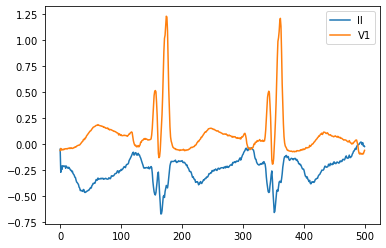

In [33]:
MI_df = resample_MI('ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re', 'xyz', ['II', 'V1'], [1,6])

#### `BIDMC CHFDB   => CHF`

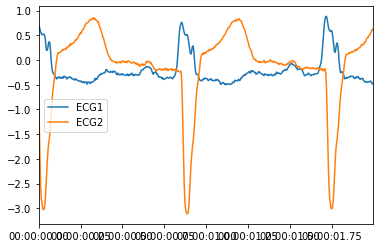

In [34]:
record = wfdb.rdrecord('bidmc-congestive-heart-failure-database-1.0.0/files/chf01', sampto=500)
df = record.to_dataframe()
df.plot();

Shape of signal Before Resampling =>  (17994491, 2)
Shape of signal After Resampling  =>  (17994491, 2)


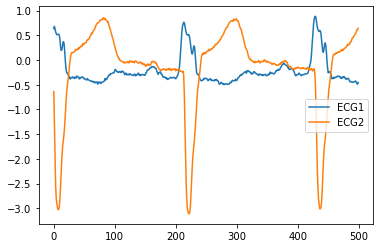

In [35]:
CHF_df = resample('bidmc-congestive-heart-failure-database-1.0.0/files/chf01', 'ecg', ['ECG1', 'ECG2'], [0,1])

## Note on Datasets division

### Note
#### The project was divided into several datasets including division:
- two-classification
- three-classification experimental
- four-classification
#### to verify the effectiveness of the network model in dealing with multi-classification problems.

#### Nine datasets (A–I) were divided for the demonstration of the experiments.
    1- Datasets A–F and G–I were used for intra-patient and inter-patient classification experiments for normal, CAD, MI, and CHF, respectively.
    2- We selected the same data points from each ECG signal to construct balanced Datasets A–C. In addition,

##### Information of balanced datasets for intra-patient experiments.
<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5971803/9906039/9906046/386-404-table-5-source-small.gif">

##### Information of unbalanced datasets for intrapatient experiments.
<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5971803/9906039/9906046/386-404-table-6-source-small.gif">

##### Information of training datasets for inter-patient experiments.
<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5971803/9906039/9906046/386-404-table-7-source-small.gif">

##### Information of test datasets for inter-patient experiments.
<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5971803/9906039/9906046/386-404-table-8-source-small.gif">

#### Data input
    The ECG signals from two leads are used as input to verify the diagnostic rate of multi-lead data for diseases. The input data are presented as follows: 
    X=[x1,1,x1,2,…,x1,M,x2,1,x2,2,…,x2,N]


##### Information of unbalanced datasets for intrapatient experiments.
<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5971803/9906039/9906046/386-404-table-6-source-small.gif">


### `get All data from each class`

##### `Helper Functions`

In [36]:
# functions used in this section
def getSpecificData(df, rows, cols):
    class_arr = []
    index = 0
    for row in range(rows):
        col_arr, ch1, ch2 = [], [], [] 
        for col in range(cols):
            ch1.append(df.iloc[index, 0])
            ch2.append(df.iloc[index, 1])
            index += 1
        col_arr = ch1 + ch2
        class_arr.append(col_arr)
    return class_arr

In [37]:
def getCombination_N(df, N, typeData):
    arr = []
    for i in range(5):
        rows_num = 35000 // N[i]
        Sub_arr = getSpecificData(df, rows_num, 500)
        print(typeData, " => len of rows of segment signal ", N[i], " = ", len(Sub_arr))
        print("len of columns of segment signal ", N[i], " = ", len(Sub_arr[0]))
        in_df = pd.DataFrame(Sub_arr)
        print("head of ", N[i], " = ", in_df.head())
        y = [typeData] * rows_num
        in_df["output"] = y 
        print("head of segment signal ", N[i], " = ", in_df.head())
        print("info of segment signal ", N[i], " = ", in_df.info())
        arr.append(in_df)
    return arr

#### 1- noraml class

In [38]:
# Normal Case Train

In [39]:
train_normal_cases = [
    16265, 16272, 16420,
    16773, 16795, 17052,
    18177, 19088, 19093,
    19830
]

Shape of signal Before Resampling =>  (11730944, 2)
Shape of signal After Resampling  =>  (22912000, 2)
Shape of signal Before Resampling =>  (11520000, 2)
Shape of signal After Resampling  =>  (22500000, 2)
Shape of signal Before Resampling =>  (11051008, 2)
Shape of signal After Resampling  =>  (21584000, 2)
Shape of signal Before Resampling =>  (11046912, 2)
Shape of signal After Resampling  =>  (21576000, 2)
Shape of signal Before Resampling =>  (10866688, 2)
Shape of signal After Resampling  =>  (21224000, 2)
Shape of signal Before Resampling =>  (10659840, 2)
Shape of signal After Resampling  =>  (20820000, 2)
Shape of signal Before Resampling =>  (11960320, 2)
Shape of signal After Resampling  =>  (23360000, 2)
Shape of signal Before Resampling =>  (10967040, 2)
Shape of signal After Resampling  =>  (21420000, 2)
Shape of signal Before Resampling =>  (10705920, 2)
Shape of signal After Resampling  =>  (20910000, 2)
Shape of signal Before Resampling =>  (10701824, 2)
Shape of sig

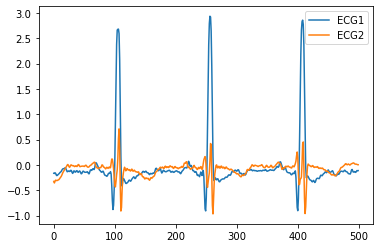

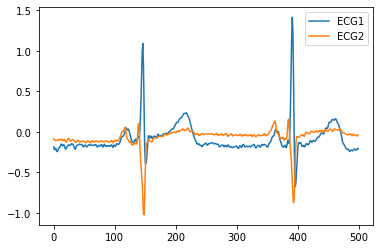

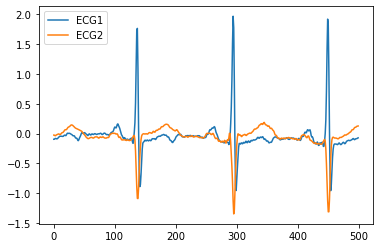

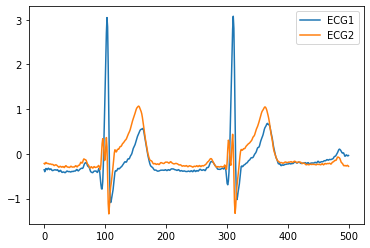

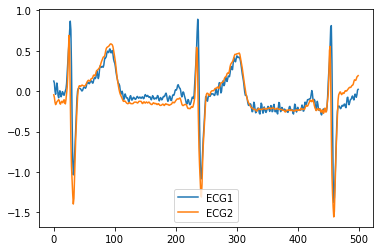

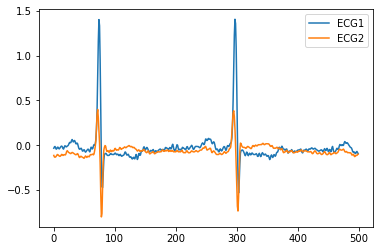

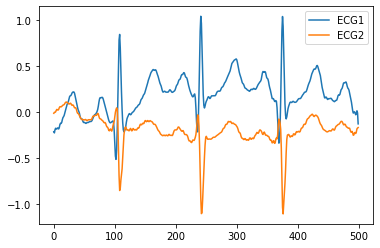

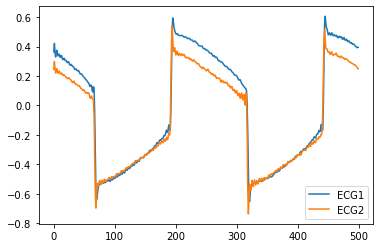

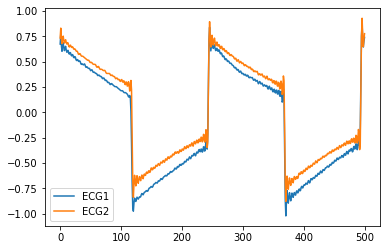

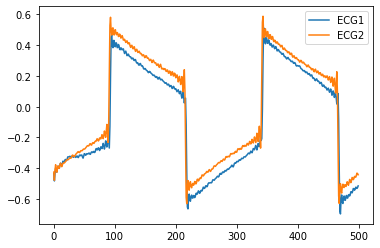

In [40]:
norm_cases = []
for case in train_normal_cases:
    normal_df_case = resample('mit-bih-normal-sinus-rhythm-database-1.0.0/'+str(case), 'atr', ['ECG1', 'ECG2'], [0,1])
    norm_cases.append(normal_df_case.iloc[:1250000,:])

In [41]:
train_normal_df = pd.concat(norm_cases)

In [42]:
train_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500000 entries, 0 to 1249999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG1    float64
 1   ECG2    float64
dtypes: float64(2)
memory usage: 286.1 MB


In [43]:
train_normal_df.shape[0] // 500

25000

In [44]:
# noraml case
train_normal_df.head()

,ECG1,ECG2
0,-0.165000,-0.325000
1,-0.168776,-0.355663
2,-0.154753,-0.323248
3,-0.167232,-0.300683
4,-0.197550,-0.305925


In [45]:
train_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500000 entries, 0 to 1249999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG1    float64
 1   ECG2    float64
dtypes: float64(2)
memory usage: 286.1 MB


In [46]:
# so when do balanced dataset we determine 25,000 accordding to smallest dataset 
train_normal_df.shape[0] // 500

25000

In [47]:
train_normal_arr = getSpecificData(train_normal_df, 25000, 500)

In [48]:
len(train_normal_arr)

25000

In [49]:
len(train_normal_arr[0])

1000

In [50]:
train_y_normal = ['Normal'] * len(train_normal_arr)

In [51]:
len(train_y_normal)

25000

In [52]:
train_normal_df = pd.DataFrame(train_normal_arr)

In [53]:
train_normal_df["output"] = train_y_normal 

In [54]:
train_normal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,output
0,-0.165,-0.168776,-0.154753,-0.167232,-0.197550,-0.211124,-0.203330,-0.192482,-0.182924,-0.167898,...,0.040005,0.036932,0.024551,0.015507,0.014967,0.015231,0.010528,0.005157,0.004069,Normal
1,-0.095,-0.095048,-0.126793,-0.155823,-0.153653,-0.135525,-0.123970,-0.120646,-0.127472,-0.149239,...,0.014909,0.017073,0.011398,0.039112,0.072214,0.058382,0.026070,0.033727,0.055729,Normal
2,-0.225,-0.227019,-0.172131,-0.137099,-0.169868,-0.208958,-0.189195,-0.152097,-0.159166,-0.168301,...,-0.019895,-0.030023,-0.053879,-0.048298,-0.024235,-0.023480,-0.044136,-0.054878,-0.058138,Normal
3,-0.295,-0.276584,-0.254224,-0.248928,-0.255347,-0.247128,-0.221190,-0.203685,-0.206389,-0.210534,...,-0.195075,-0.212964,-0.218552,-0.215370,-0.217730,-0.233215,-0.249608,-0.254968,-0.255059,Normal
4,-0.165,-0.151894,-0.176458,-0.198733,-0.193563,-0.175446,-0.163983,-0.159482,-0.153436,-0.140339,...,-0.025875,-0.017300,-0.008837,-0.013961,-0.014726,0.003092,0.013856,-0.003781,-0.023318,Normal


In [55]:
train_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 1001 entries, 0 to output
dtypes: float64(1000), object(1)
memory usage: 190.9+ MB


In [56]:
# Normal Case Test

In [57]:
test_normal_cases = [
    16273, 16483, 16539,
    16786, 17453, 18184,
    19140
]

Shape of signal Before Resampling =>  (11354112, 2)
Shape of signal After Resampling  =>  (22176000, 2)
Shape of signal Before Resampling =>  (11960320, 2)
Shape of signal After Resampling  =>  (23360000, 2)
Shape of signal Before Resampling =>  (11327488, 2)
Shape of signal After Resampling  =>  (22124000, 2)
Shape of signal Before Resampling =>  (11284480, 2)
Shape of signal After Resampling  =>  (22040000, 2)
Shape of signal Before Resampling =>  (11235328, 2)
Shape of signal After Resampling  =>  (21944000, 2)
Shape of signal Before Resampling =>  (10942464, 2)
Shape of signal After Resampling  =>  (21372000, 2)
Shape of signal Before Resampling =>  (11139072, 2)
Shape of signal After Resampling  =>  (21756000, 2)


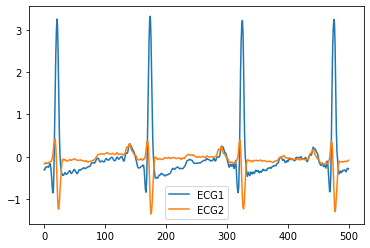

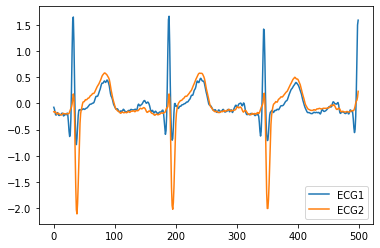

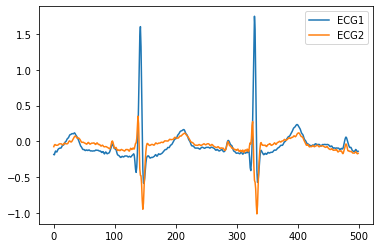

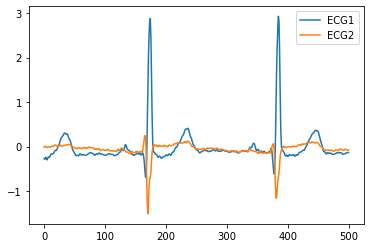

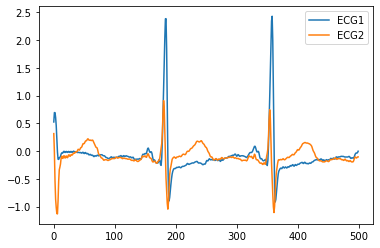

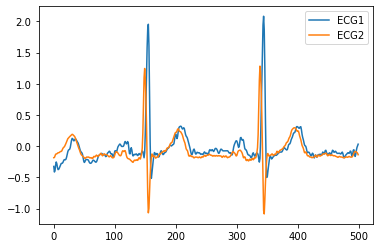

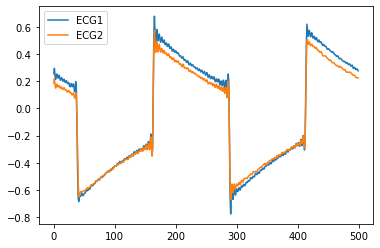

In [58]:
norm_cases = []
for case in test_normal_cases:
    normal_df_case = resample('mit-bih-normal-sinus-rhythm-database-1.0.0/'+str(case), 'atr', ['ECG1', 'ECG2'], [0,1])
    norm_cases.append(normal_df_case.iloc[:1250000,:])

In [59]:
test_normal_df = pd.concat(norm_cases)

In [60]:
test_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8750000 entries, 0 to 1249999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG1    float64
 1   ECG2    float64
dtypes: float64(2)
memory usage: 200.3 MB


In [61]:
test_normal_df.shape[0] // 500

17500

In [62]:
# noraml case
test_normal_df.head()

,ECG1,ECG2
0,-0.305000,-0.165000
1,-0.316042,-0.169361
2,-0.262880,-0.143997
3,-0.242834,-0.139272
4,-0.244752,-0.156628


In [63]:
test_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8750000 entries, 0 to 1249999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG1    float64
 1   ECG2    float64
dtypes: float64(2)
memory usage: 200.3 MB


In [64]:
# so when do balanced dataset we determine 20,000 accordding to smallest dataset 
test_normal_df.shape[0] // 500

17500

In [65]:
test_normal_arr = getSpecificData(test_normal_df, 17500, 500)

In [66]:
len(test_normal_arr)

17500

In [67]:
len(test_normal_arr[0])

1000

In [68]:
test_y_normal = ['Normal'] * len(test_normal_arr)

In [69]:
len(test_y_normal)

17500

In [70]:
test_normal_df = pd.DataFrame(test_normal_arr)

In [71]:
test_normal_df["output"] = test_y_normal 

In [72]:
test_normal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,output
0,-0.305,-0.316042,-0.262880,-0.242834,-0.244752,-0.235046,-0.236838,-0.251241,-0.225823,-0.166099,...,-0.125911,-0.117344,-0.106018,-0.104288,-0.111600,-0.115221,-0.108139,-0.095600,-0.083505,Normal
1,-0.295,-0.304139,-0.315003,-0.293395,-0.252020,-0.251321,-0.290077,-0.291812,-0.231642,-0.180852,...,-0.048272,-0.045183,-0.041965,-0.027820,-0.007490,0.004539,0.005633,0.004968,0.006047,Normal
2,-0.075,-0.073902,-0.075247,-0.084729,-0.095836,-0.101324,-0.105958,-0.116383,-0.126173,-0.124231,...,-0.056085,-0.054869,-0.056974,-0.056019,-0.044315,-0.034809,-0.052632,-0.102266,-0.156821,Normal
3,-0.045,-0.063465,-0.085533,-0.071951,-0.019755,0.019841,0.024774,0.032821,0.060016,0.066560,...,0.008827,0.013686,0.023423,0.034278,0.031893,0.016506,0.005085,0.004875,0.006338,Normal
4,-0.095,-0.081340,-0.084957,-0.061320,0.001085,0.042208,0.032189,0.031541,0.089209,0.160398,...,-0.185862,-0.187110,-0.170314,-0.155558,-0.160927,-0.174467,-0.163990,-0.108711,-0.011548,Normal


In [73]:
test_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Columns: 1001 entries, 0 to output
dtypes: float64(1000), object(1)
memory usage: 133.6+ MB


#### 2- CAD class

In [74]:
train_CAD_cases = [
    'I01', 'I20', 'I35', 'I39', 'I44',
    'I45', 'I72'
]

Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)


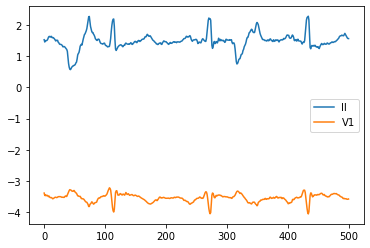

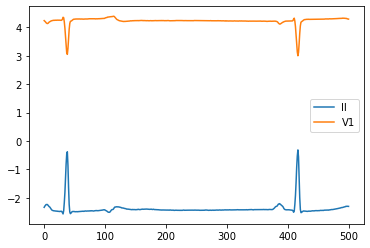

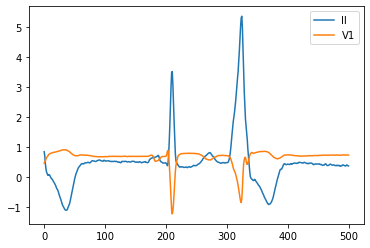

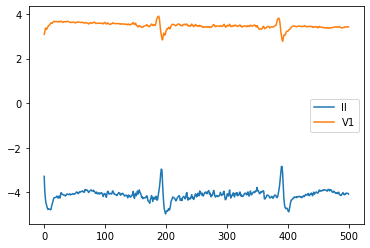

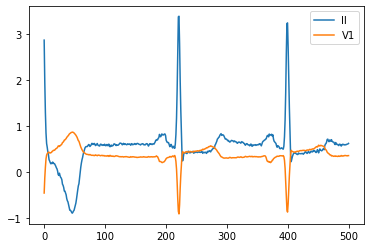

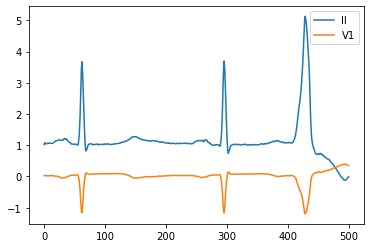

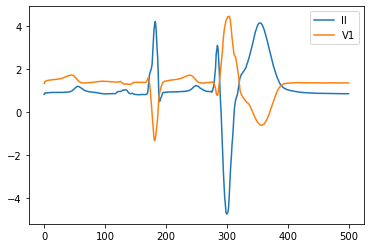

In [75]:
CAD_cases = []
for case in train_CAD_cases:
    CAD_df_case = resample('st-petersburg-incart-12-lead-arrhythmia-database-1.0.0/files/'+case, 'atr', ['II', 'V1'], [1,6])
    CAD_df_case = pd.concat([CAD_df_case]*3 )
    CAD_cases.append(CAD_df_case.iloc[:1250000,:])

In [76]:
train_CAD_df = pd.concat(CAD_cases)

In [77]:
train_CAD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8750000 entries, 0 to 349999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   II      float64
 1   V1      float64
dtypes: float64(2)
memory usage: 200.3 MB


In [78]:
train_CAD_df.shape[0] // 500

17500

In [80]:
train_CAD_arr = getSpecificData(train_CAD_df, 17500, 500)

In [81]:
len(train_CAD_arr)

17500

In [82]:
len(train_CAD_arr[0])

1000

In [83]:
train_y_CAD = ['CAD'] * len(train_CAD_arr)

In [84]:
len(train_y_CAD)

17500

In [85]:
train_CAD_df = pd.DataFrame(train_CAD_arr)

In [86]:
train_CAD_df["output"] = train_y_CAD 

In [87]:
train_CAD_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,output
0,1.534823,1.461602,1.507436,1.502594,1.505903,1.522188,1.556129,1.612479,1.637994,1.641554,...,-3.569350,-3.562776,-3.574534,-3.572560,-3.573726,-3.587203,-3.588435,-3.591306,-3.582243,CAD
1,1.553173,1.504104,1.449354,1.431309,1.462918,1.504181,1.519859,1.501733,1.484288,1.475711,...,-3.431288,-3.429318,-3.443139,-3.428975,-3.433633,-3.427455,-3.403091,-3.404502,-3.411957,CAD
2,1.299701,1.298074,1.278416,1.247503,1.245420,1.251831,1.245449,1.284859,1.312413,1.316816,...,-3.275601,-3.252850,-3.241926,-3.235185,-3.219086,-3.225197,-3.222156,-3.231620,-3.219694,CAD
3,0.950561,0.926517,0.843098,0.841727,0.847125,0.904252,0.970369,0.988246,0.977282,1.003259,...,-3.354740,-3.315040,-3.322163,-3.317505,-3.280529,-3.253115,-3.217131,-3.194948,-3.160444,CAD
4,1.189218,1.176756,1.168634,1.145591,1.142052,1.169958,1.167669,1.162955,1.145915,1.151187,...,-2.867436,-2.843795,-2.904727,-3.010178,-3.047077,-3.030743,-3.018162,-2.988432,-2.976959,CAD


In [88]:
test_CAD_cases = [
    'I21', 'I22', 'I38', 'I58', 'I73'
]

Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)
Shape of signal Before Resampling =>  (462600, 2)
Shape of signal After Resampling  =>  (450000, 2)


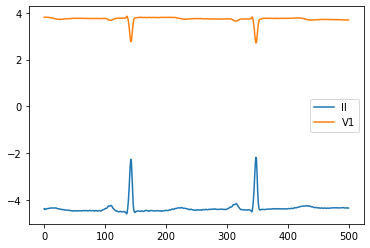

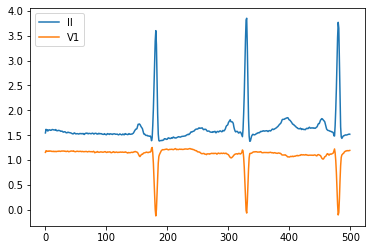

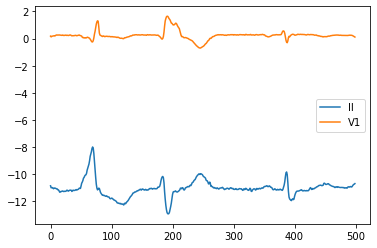

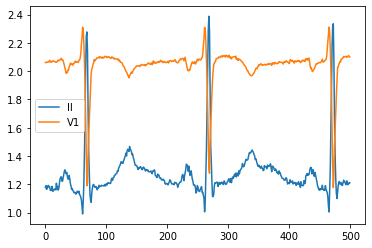

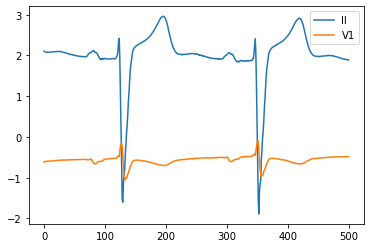

In [89]:
CAD_cases = []
for case in test_CAD_cases:
    CAD_df_case = resample('st-petersburg-incart-12-lead-arrhythmia-database-1.0.0/files/'+case, 'atr', ['II', 'V1'], [1,6])
    CAD_df_case = pd.concat([CAD_df_case] * 4)
    CAD_cases.append(CAD_df_case.iloc[:1500000,:])

In [90]:
test_CAD_df = pd.concat(CAD_cases)

In [91]:
test_CAD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500000 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   II      float64
 1   V1      float64
dtypes: float64(2)
memory usage: 171.7 MB


In [92]:
test_CAD_df.shape[0] // 500

15000

In [93]:
test_CAD_arr = getSpecificData(test_CAD_df, 15000, 500)

In [94]:
len(test_CAD_arr)

15000

In [95]:
len(test_CAD_arr[0])

1000

In [96]:
test_y_CAD = ['CAD'] * len(test_CAD_arr)

In [97]:
len(test_y_CAD)

15000

In [98]:
test_CAD_df = pd.DataFrame(test_CAD_arr)

In [99]:
test_CAD_df["output"] = test_y_CAD 

In [100]:
test_CAD_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,output
0,-4.365586,-4.395177,-4.379022,-4.385719,-4.366862,-4.359393,-4.356987,-4.353978,-4.348519,-4.345345,...,3.699020,3.700913,3.696455,3.692244,3.694758,3.696460,3.695443,3.692324,3.695127,CAD
1,-4.328810,-4.333834,-4.341855,-4.345943,-4.340920,-4.337041,-4.333135,-4.338768,-4.335543,-4.327293,...,3.829946,3.829060,3.825875,3.827876,3.829840,3.828822,3.825756,3.824570,3.821376,CAD
2,-4.583386,-4.579289,-4.587960,-4.591597,-4.586793,-4.583266,-4.583144,-4.584334,-4.593291,-4.589114,...,3.726281,3.723968,3.726060,3.720887,3.721091,3.720536,3.721132,3.720541,3.721121,CAD
3,-4.416169,-4.408737,-4.412472,-4.422108,-4.429100,-4.429364,-4.422958,-4.417296,-4.427263,-4.434567,...,3.700081,3.702993,3.704501,3.707225,3.708813,3.711468,3.713250,3.708164,3.704607,CAD
4,-4.392523,-4.378136,-4.389506,-4.414648,-4.474734,-4.482686,-4.316199,-4.034518,-3.685258,-3.149525,...,3.743433,3.749732,3.750207,3.746646,3.745427,3.746045,3.749265,3.750537,3.749524,CAD


#### 3- MI class

In [101]:
train_MI_cases = {
    '033':'s0157lre', '140':'s0019_re', '152':'s0004_re', '193':'s0008_re',
    '211':'s0433_re', '268':'s0505_re'
}


Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
(1257600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
(1257600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
(1257600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
(1257600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
(1257600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
(1257600, 2)


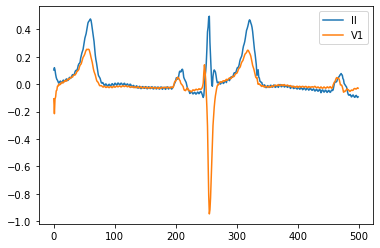

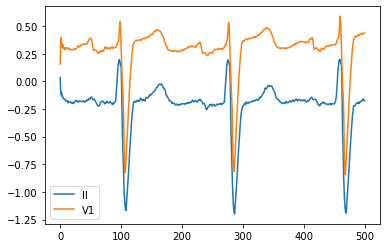

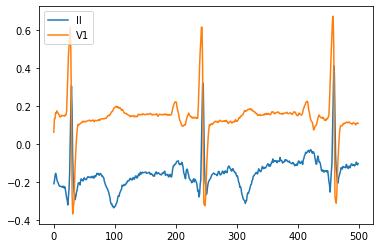

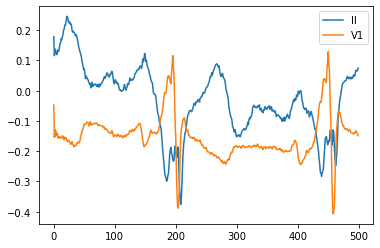

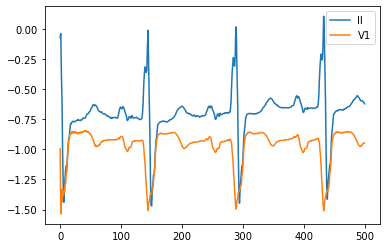

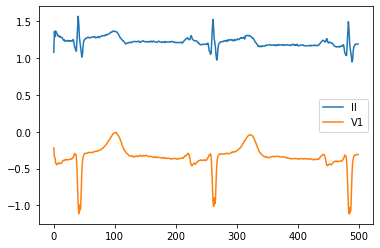

In [102]:
MI_cases = []
for p, f in train_MI_cases.items():
    MI_df_case = resample_MI('ptb-diagnostic-ecg-database-1.0.0/patient'+p+'/'+f, 'xyz', ['II', 'V1'], [1,6])
    MI_df_case = pd.concat([MI_df_case] * 131)
    print(MI_df_case.shape)
    MI_cases.append(MI_df_case.iloc[:1250000,:])

In [103]:
for i in MI_cases:
    print(i.shape)

(1250000, 2)
(1250000, 2)
(1250000, 2)
(1250000, 2)
(1250000, 2)
(1250000, 2)


In [104]:
train_MI_df = pd.concat(MI_cases)

In [105]:
train_MI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   II      float64
 1   V1      float64
dtypes: float64(2)
memory usage: 171.7 MB


In [106]:
train_MI_df.shape[0] // 500

15000

In [107]:
train_MI_df.shape[0]//500

15000

In [108]:
train_MI_arr = getSpecificData(train_MI_df, 15000, 500)

In [109]:
len(train_MI_arr)

15000

In [110]:
len(train_MI_arr[0])

1000

In [111]:
train_y_MI = ['MI'] * len(train_MI_arr)

In [112]:
len(train_y_MI)

15000

In [113]:
train_MI_df = pd.DataFrame(train_MI_arr)

In [114]:
train_MI_df["output"] = train_y_MI 

In [115]:
train_MI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,output
0,0.103936,0.120514,0.103033,0.072247,0.048671,0.035325,0.028894,0.017849,0.007212,0.011586,...,-0.042670,-0.034251,-0.031870,-0.032127,-0.035498,-0.035124,-0.031116,-0.026294,-0.029364,MI
1,-0.081566,-0.079285,-0.086768,-0.092339,-0.093550,-0.093410,-0.114588,-0.129975,-0.091922,0.004156,...,0.016366,0.004453,-0.006959,-0.012015,-0.021874,-0.036936,-0.042220,-0.054114,-0.054410,MI
2,-0.032397,-0.020266,-0.036997,-0.058378,-0.079204,-0.080031,-0.082754,-0.102618,-0.114797,-0.102884,...,-0.030847,-0.027492,-0.023660,-0.024527,-0.029886,-0.029509,-0.025666,-0.022391,-0.024050,MI
3,-0.073003,-0.050140,-0.036000,-0.035471,-0.030074,-0.008369,0.002719,0.003934,-0.004087,0.002291,...,-0.046718,-0.043919,-0.039066,-0.038639,-0.046057,-0.049191,-0.046266,-0.040620,-0.039749,MI
4,-0.161747,-0.156342,-0.157557,-0.168252,-0.171040,-0.163681,-0.156764,-0.161572,-0.170776,-0.173150,...,-0.070179,-0.066775,-0.061691,-0.058901,-0.061250,-0.066274,-0.063416,-0.058690,-0.059788,MI


In [116]:
test_MI_cases = {
    '056':'s0196lre', '149':'s0202are', '205':'s0426_re', '231':'s0455_re', '283':'s0542_re'
}

Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)
Shape of signal Before Resampling =>  (38400, 2)
Shape of signal After Resampling  =>  (9600, 2)


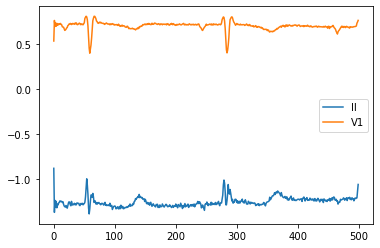

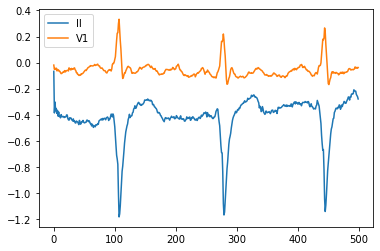

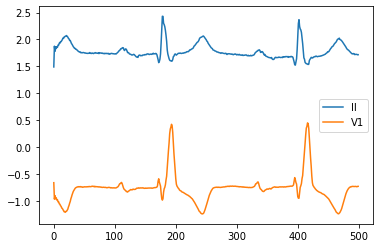

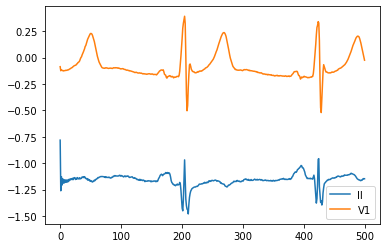

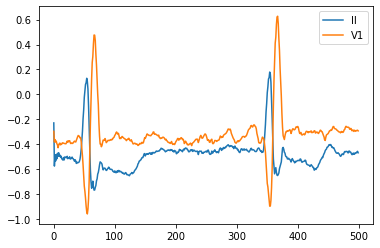

In [117]:
MI_cases = []
for p, f in test_MI_cases.items():
    MI_df_case = resample_MI('ptb-diagnostic-ecg-database-1.0.0/patient'+p+'/'+f, 'xyz', ['II', 'V1'], [1,6])
    MI_df_case = pd.concat([MI_df_case] * 157)
    MI_cases.append(MI_df_case.iloc[:1500000,:]) 

In [118]:
test_MI_df = pd.concat(MI_cases)

In [119]:
test_MI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500000 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   II      float64
 1   V1      float64
dtypes: float64(2)
memory usage: 171.7 MB


In [120]:
test_MI_df.shape[0] // 500

15000

In [121]:
test_MI_arr = getSpecificData(test_MI_df, 15000, 500)

In [122]:
len(test_MI_arr)

15000

In [123]:
len(test_MI_arr[0])

1000

In [124]:
test_y_MI = ['MI'] * len(test_MI_arr)

In [125]:
len(test_y_MI)

15000

In [126]:
test_MI_df = pd.DataFrame(test_MI_arr)

In [127]:
test_MI_df["output"] = test_y_MI 

In [128]:
test_MI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,output
0,-0.880602,-1.371367,-1.237942,-1.314665,-1.248985,-1.320570,-1.281004,-1.288584,-1.266189,-1.259928,...,0.693594,0.697700,0.698149,0.698259,0.701057,0.704316,0.735489,0.749767,0.767291,MI
1,-0.990810,-0.983254,-1.040468,-1.194879,-1.252695,-1.169122,-1.113857,-1.038790,-1.039731,-1.094044,...,0.656861,0.653917,0.650486,0.645779,0.650040,0.652068,0.652023,0.638758,0.645353,MI
2,-1.226434,-1.223443,-1.227696,-1.245003,-1.240004,-1.213462,-1.232198,-1.230601,-1.224409,-1.234845,...,0.566691,0.570382,0.553059,0.562571,0.559016,0.565460,0.569432,0.559206,0.570894,MI
3,-1.069387,-1.071470,-1.095997,-1.073398,-1.085134,-1.077456,-1.104941,-1.123536,-1.100639,-1.112390,...,0.552614,0.554397,0.552325,0.535642,0.542202,0.542589,0.543469,0.542588,0.545540,MI
4,-1.012452,-1.019725,-0.995423,-1.024898,-1.035582,-1.003161,-1.013525,-1.046675,-1.026509,-1.024354,...,0.508710,0.513644,0.513728,0.508766,0.515110,0.504548,0.502558,0.510811,0.510857,MI


In [129]:
# train_MI_df.to_csv('D:/4th/GP/Inter-Patient/Train_MI'+'.csv', index=False)
# test_MI_df.to_csv('D:/4th/GP/Inter-Patient/Test_MI'+'.csv', index=False)

#### 4- CHF class

In [130]:
# same normal 

In [131]:
# CHF Case Train

In [132]:
train_CHF_cases = [
    'chf01', 'chf02', 'chf04',
    'chf09', 'chf10', 'chf12'
]

Shape of signal Before Resampling =>  (17994491, 2)
Shape of signal After Resampling  =>  (17994491, 2)
Shape of signal Before Resampling =>  (17793024, 2)
Shape of signal After Resampling  =>  (17793024, 2)
Shape of signal Before Resampling =>  (17998848, 2)
Shape of signal After Resampling  =>  (17998848, 2)
Shape of signal Before Resampling =>  (17796577, 2)
Shape of signal After Resampling  =>  (17796577, 2)
Shape of signal Before Resampling =>  (17995711, 2)
Shape of signal After Resampling  =>  (17995711, 2)
Shape of signal Before Resampling =>  (17842176, 2)
Shape of signal After Resampling  =>  (17842176, 2)


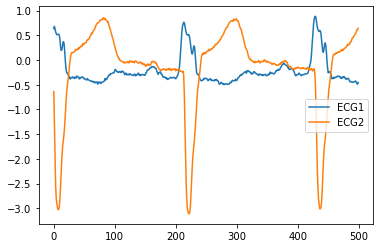

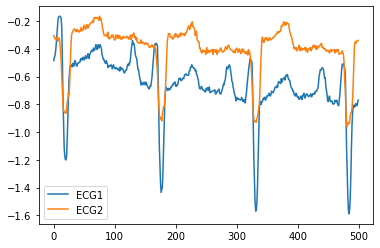

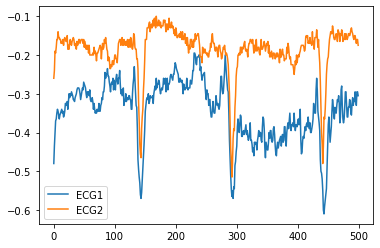

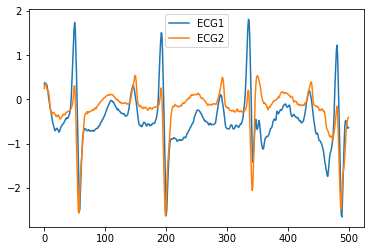

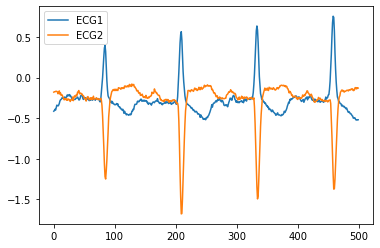

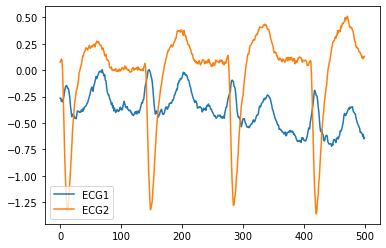

In [133]:
chf_cases = []
for case in train_CHF_cases:
    chf_df_case = resample('bidmc-congestive-heart-failure-database-1.0.0/files/'+str(case), 'ecg', ['ECG1', 'ECG2'], [0,1])
    chf_cases.append(chf_df_case.iloc[:1250000,:])

In [134]:
train_chf_df = pd.concat(chf_cases)

In [135]:
train_chf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500000 entries, 0 to 1249999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG1    float64
 1   ECG2    float64
dtypes: float64(2)
memory usage: 171.7 MB


In [136]:
train_chf_df.shape[0] // 500

15000

In [137]:
# noraml case
train_chf_df.head()

,ECG1,ECG2
0,0.635,-0.640
1,0.680,-1.280
2,0.630,-1.920
3,0.570,-2.535
4,0.535,-2.800


In [138]:
train_chf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500000 entries, 0 to 1249999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG1    float64
 1   ECG2    float64
dtypes: float64(2)
memory usage: 171.7 MB


In [139]:
# so when do balanced dataset we determine 20,000 accordding to smallest dataset 
train_chf_df.shape[0] // 500

15000

In [140]:
train_chf_arr = getSpecificData(train_chf_df, 15000, 500)

In [141]:
len(train_chf_arr)

15000

In [142]:
len(train_chf_arr[0])

1000

In [143]:
train_y_chf = ['CHF'] * len(train_chf_arr)

In [144]:
len(train_y_chf)

15000

In [145]:
train_chf_df = pd.DataFrame(train_chf_arr)

In [146]:
train_chf_df["output"] = train_y_chf 

In [147]:
train_chf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,output
0,0.635,0.68,0.630,0.570,0.535,0.510,0.515,0.520,0.525,0.495,...,0.455,0.485,0.505,0.520,0.545,0.580,0.610,0.610,0.645,CHF
1,-0.480,-0.48,-0.455,-0.475,-0.475,-0.475,-0.495,-0.465,-0.465,-0.445,...,0.000,0.000,0.000,0.010,0.020,0.000,0.005,0.000,0.000,CHF
2,-0.400,-0.39,-0.385,-0.365,-0.355,-0.365,-0.325,-0.330,-0.355,-0.355,...,-0.100,-0.085,-0.095,-0.100,-0.090,-0.105,-0.120,-0.115,-0.140,CHF
3,0.770,0.92,1.020,1.055,1.030,0.945,0.830,0.745,0.695,0.675,...,0.505,0.510,0.530,0.555,0.570,0.595,0.620,0.605,0.640,CHF
4,-0.595,-0.63,-0.640,-0.625,-0.615,-0.625,-0.640,-0.640,-0.665,-0.650,...,-0.060,-0.075,-0.060,-0.065,-0.065,-0.050,-0.075,-0.075,-0.055,CHF


In [148]:
train_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 1001 entries, 0 to output
dtypes: float64(1000), object(1)
memory usage: 190.9+ MB


In [149]:
# Normal Case Test

In [150]:
test_chf_cases = [
    'chf03', 'chf06', 'chf08',
    'chf14'
]

Shape of signal Before Resampling =>  (17998848, 2)
Shape of signal After Resampling  =>  (17998848, 2)
Shape of signal Before Resampling =>  (17789952, 2)
Shape of signal After Resampling  =>  (17789952, 2)
Shape of signal Before Resampling =>  (17998848, 2)
Shape of signal After Resampling  =>  (17998848, 2)
Shape of signal Before Resampling =>  (17998848, 2)
Shape of signal After Resampling  =>  (17998848, 2)


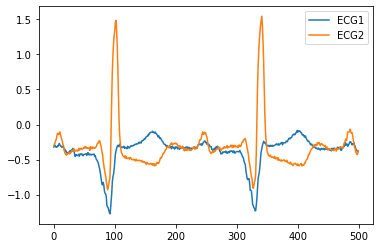

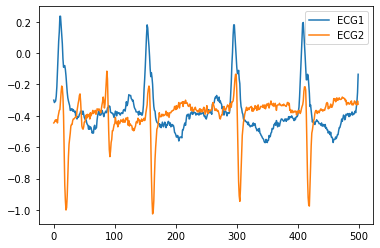

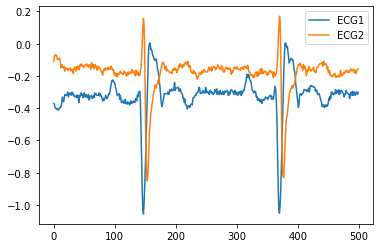

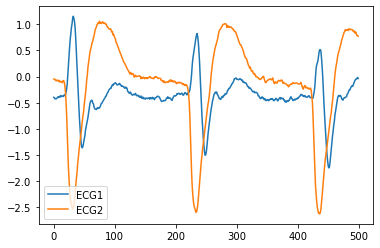

In [151]:
chft_cases = []
for case in test_chf_cases:
    chf_test_df_case = resample('bidmc-congestive-heart-failure-database-1.0.0/files/'+str(case), 'ecg', ['ECG1', 'ECG2'], [0,1])
    chft_cases.append(chf_test_df_case.iloc[:1250000,:])

In [152]:
test_chf_df = pd.concat(chft_cases)

In [153]:
test_chf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000000 entries, 0 to 1249999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG1    float64
 1   ECG2    float64
dtypes: float64(2)
memory usage: 114.4 MB


In [154]:
test_chf_df.shape[0] // 500

10000

In [155]:
# noraml case
test_chf_df.head()

,ECG1,ECG2
0,-0.320,-0.305
1,-0.305,-0.285
2,-0.295,-0.260
3,-0.320,-0.230
4,-0.320,-0.215


In [156]:
test_chf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000000 entries, 0 to 1249999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG1    float64
 1   ECG2    float64
dtypes: float64(2)
memory usage: 114.4 MB


In [157]:
# so when do balanced dataset we determine 20,000 accordding to smallest dataset 
test_chf_df.shape[0] // 500

10000

In [158]:
test_chf_arr = getSpecificData(test_chf_df, 10000, 500)

In [159]:
len(test_chf_arr)

10000

In [160]:
len(test_chf_arr[0])

1000

In [161]:
test_y_chf = ['CHF'] * len(test_chf_arr)

In [162]:
len(test_y_chf)

10000

In [163]:
test_chf_df = pd.DataFrame(test_chf_arr)

In [164]:
test_chf_df["output"] = test_y_chf 

In [165]:
test_chf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,output
0,-0.320,-0.305,-0.295,-0.320,-0.32,-0.325,-0.305,-0.310,-0.285,-0.270,...,-0.220,-0.265,-0.315,-0.340,-0.390,-0.405,-0.425,-0.425,-0.375,CHF
1,-0.365,-0.370,-0.355,-0.350,-0.34,-0.340,-0.340,-0.320,-0.320,-0.330,...,-0.285,-0.280,-0.265,-0.270,-0.275,-0.280,-0.290,-0.280,-0.270,CHF
2,-0.355,-0.365,-0.360,-0.340,-0.37,-0.355,-0.355,-0.340,-0.340,-0.350,...,-0.260,-0.290,-0.285,-0.275,-0.255,-0.270,-0.230,-0.215,-0.195,CHF
3,-0.530,-0.560,-0.615,-0.675,-0.74,-0.770,-0.815,-0.810,-0.830,-0.910,...,-0.650,-0.400,0.100,0.505,0.810,1.060,1.200,1.300,1.370,CHF
4,-0.345,-0.310,-0.250,-0.235,-0.19,-0.200,-0.210,-0.205,-0.205,-0.215,...,-0.385,-0.400,-0.405,-0.360,-0.420,-0.430,-0.465,-0.480,-0.450,CHF


In [166]:
test_chf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1001 entries, 0 to output
dtypes: float64(1000), object(1)
memory usage: 76.4+ MB


### `Create differenet balanced datasets and save them in csvs files`

In [179]:
# two-classification
# three-classification experimental
# four-classification
dataset_G_Train = pd.concat([train_normal_df, train_chf_df])
dataset_H_Train = pd.concat([train_normal_df, train_CAD_df, train_chf_df])
dataset_G_Test = pd.concat([test_normal_df, test_chf_df])
dataset_H_Test = pd.concat([test_normal_df, test_CAD_df, test_chf_df])

In [ ]:
dataset_I_Train = pd.concat([train_normal_df, train_CAD_df, train_MI_df, train_chf_df])
dataset_I_Test = pd.concat([test_normal_df, test_CAD_df, test_MI_df, test_chf_df])

In [ ]:
print(dataset_G_Train.output.unique(), dataset_H_Train.output.unique(), dataset_I_Train.output.unique())
print(dataset_G_Test.output.unique(), dataset_H_Test.output.unique(), dataset_I_Test.output.unique())

In [178]:
print(dataset_G_Train.shape, dataset_H_Train.shape, dataset_I_Train.shape)
print(dataset_G_Test.shape, dataset_H_Test.shape, dataset_I_Test.shape)

NameError: name 'dataset_G_Train' is not defined

In [175]:
dataset_G_Train.to_csv('D:/4th/GP/Inter-Patient/dataset_G_Train'+'.csv', index=False)
dataset_H_Train.to_csv('D:/4th/GP/Inter-Patient/dataset_H_Train'+'.csv', index=False)
dataset_G_Test.to_csv('D:/4th/GP/Inter-Patient/dataset_G_Test'+'.csv', index=False)
dataset_H_Test.to_csv('D:/4th/GP/Inter-Patient/dataset_H_Test'+'.csv', index=False)

In [176]:
dataset_I_Train.to_csv('D:/4th/GP/Inter-Patient/dataset_I_Train'+'.csv', index=False)
dataset_I_Test.to_csv('D:/4th/GP/Inter-Patient/dataset_I_Test'+'.csv', index=False)

## The End of processing and division balanced datasets for intra-patient